In [2]:
# Jupyter magic
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # standard Python plotting library

# import the tdt library
import tdt
import pandas as pd

In [27]:
# Must read with "/" not "\
mPFC_PATH = 'C:/Users/yongc/Desktop/Exp2 - DA response to Social Defeat/dLight_mPFC-240226-042525'
mPFC_data = tdt.read_block(mPFC_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Exp2 - DA response to Social Defeat/dLight_mPFC-240226-042525\Notes.txt
read from t=0s to t=844.09s


## Basic Plotting

In [29]:
#Jupyter has a bug that requires import of matplotlib outside of cell with matplotlib inline magic to properly apply rcParams

import matplotlib
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'

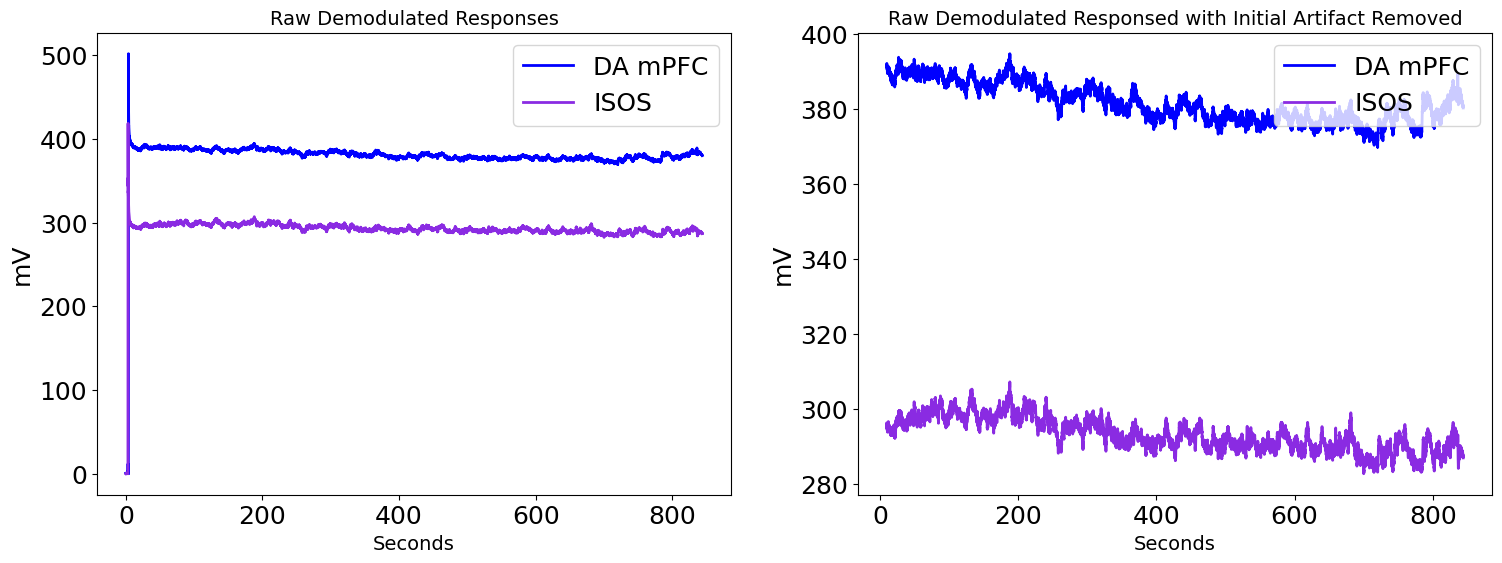

In [30]:
# Make a time array based on the number of samples and sample freq of 
# the demodulated streams
mPFC_time = np.linspace(1,len(mPFC_data.streams[DA].data), len(mPFC_data.streams[DA].data))/mPFC_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(mPFC_time, mPFC_data.streams[DA].data, linewidth=2, color='blue', label='DA mPFC')
p2, = ax0.plot(mPFC_time, mPFC_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds', fontsize=14)
ax0.set_title('Raw Demodulated Responses', fontsize=14)
ax0.legend(handles=[p1,p2], loc='upper right')



# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 10
inds = np.where(mPFC_time>t)
ind = inds[0][0]
mPFC_time = mPFC_time[ind:] # go from ind to final index
mPFC_data.streams[DA].data = mPFC_data.streams[DA].data[ind:]
mPFC_data.streams[ISOS].data = mPFC_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(mPFC_time,mPFC_data.streams[DA].data, linewidth=2, color='blue', label='DA mPFC')
p2, = ax1.plot(mPFC_time,mPFC_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds' , fontsize=14)
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed', fontsize=14)
ax1.legend(handles=[p1,p2],loc='upper right')
# fig


## Converting OpenScope Data to Epocs

In [39]:
mPFC_data.epocs.Cam1.notes

ts:	array([189.915136  , 192.65093632, 194.9278208 , 195.20110592,
       200.6532096 , 200.92731392, 202.65517056, 203.19780864,
       213.91638528, 215.92014848, 233.26359552, 233.91944704,
       242.46304768, 242.93015552, 243.1967232 , 243.92269824,
       252.92865536, 255.1996416 , 257.11935488, 259.3931264 ,
       300.92935168, 301.26473216, 317.91972352, 318.78119424,
       325.92084992, 347.92292352, 348.782592  , 350.92955136,
       351.26263808, 359.9212544 , 360.25679872, 369.922048  ,
       370.65654272, 384.7200768 , 384.8658944 , 407.92293376,
       408.928256  , 434.72011264, 435.26455296, 461.9247616 ,
       462.934016  , 484.93248512, 485.79346432, 498.93113856,
       500.12831744, 519.92363008, 529.92278528, 530.87076352,
       551.92387584, 552.6626304 , 559.92205312, 560.87085056,
       560.93392896, 562.65670656, 605.92340992, 606.13001216,
       630.9363712 , 632.7902208 , 633.92104448, 635.58631424,
       635.9252992 , 640.93339648, 642.47185408, 64

In [42]:
os_times = mPFC_data.epocs.Cam1.notes.ts
os_labels = mPFC_data.epocs.Cam1.notes.notes

In [50]:
os_fs_onset_count = np.count_nonzero(os_labels == "Face sniffing start")
os_fs_offset_count = np.count_nonzero(os_labels == "Face sniffing stop")
os_as_onset_count = np.count_nonzero(os_labels == "Anogenital sniffing start")
os_as_offset_count = np.count_nonzero(os_labels == "Anigenital sniffing stop")

In [52]:
print(os_fs_onset_count)
print(os_fs_offset_count)
print(os_as_onset_count)
print(os_as_offset_count)

27
36
7
13


In [43]:
os_fs_onset = []
os_fs_offset = []
os_as_onset = []
os_as_offset = []

In [44]:
for time, label in zip(os_times, os_labels):
    if label == "Face sniffing start":
        os_fs_onset.append(time)
    elif label == "Face sniffing stop":
        os_fs_offset.append(time)
    elif label == "Anogenital sniffing start":
        os_as_onset.append(time)
    elif label == "Anigenital sniffing stop":
        os_as_offset.append(time)

In [61]:
os_as_onset

[194.9278208,
 200.6532096,
 202.65517056,
 242.46304768,
 633.92104448,
 684.99931136,
 788.32631808]

In [60]:
os_as_offset

[195.20110592,
 200.92731392,
 203.19780864,
 233.26359552,
 233.91944704,
 243.1967232,
 300.92935168,
 519.92363008,
 635.58631424,
 659.92753152,
 684.93656064,
 785.92802816,
 787.92671232]

In [62]:
# This is me extrapolating from Andrea's data and finding timepoints similiar to mine
os_fs_onset = [189.915136, 744.59889664, 746.38966784]
os_fs_offset = [192.65093632, 744.93247488, 781.92689152]
os_as_onset = [194.9278208, 200.6532096, 202.65517056, 242.46304768, 684.93656064]
os_as_offset = [195.20110592, 200.92731392, 203.19780864, 243.1967232, 684.99931136]

## Converting Boris Data to Epocs

In [31]:
csv_path = r"C:\Users\yongc\Desktop\Exp2 - DA response to Social Defeat\Adjusted Videos\mPFC_CD1_02262024.csv"
bout_df = pd.read_csv(csv_path)

In [32]:
bout_df.head()

,Observation id,Observation date,Description,Observation duration,Observation type,Source,Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,Exp2_mPFC_02262024,2/26/2024 17:37,NaN,557.789,Media file(s),player #1:C:/Users/yongc/Desktop/Exp2 - DA res...,844.158,17.46,NaN,face sniffing,NaN,START,189.920,C:/Users/yongc/Desktop/Exp2 - DA response to S...,3317,NaN,NaN
1,Exp2_mPFC_02262024,2/26/2024 17:37,NaN,557.789,Media file(s),player #1:C:/Users/yongc/Desktop/Exp2 - DA res...,844.158,17.46,NaN,face sniffing,NaN,STOP,192.554,C:/Users/yongc/Desktop/Exp2 - DA response to S...,3363,NaN,NaN
2,Exp2_mPFC_02262024,2/26/2024 17:37,NaN,557.789,Media file(s),player #1:C:/Users/yongc/Desktop/Exp2 - DA res...,844.158,17.46,NaN,anogential sniffing,NaN,START,195.074,C:/Users/yongc/Desktop/Exp2 - DA response to S...,3407,NaN,NaN
3,Exp2_mPFC_02262024,2/26/2024 17:37,NaN,557.789,Media file(s),player #1:C:/Users/yongc/Desktop/Exp2 - DA res...,844.158,17.46,NaN,anogential sniffing,NaN,STOP,195.934,C:/Users/yongc/Desktop/Exp2 - DA response to S...,3422,NaN,NaN
4,Exp2_mPFC_02262024,2/26/2024 17:37,NaN,557.789,Media file(s),player #1:C:/Users/yongc/Desktop/Exp2 - DA res...,844.158,17.46,NaN,anogential sniffing,NaN,START,200.401,C:/Users/yongc/Desktop/Exp2 - DA response to S...,3500,NaN,NaN


fs = Facial Sniffing, 
as = Anogenital Sniffing

In [33]:
fs_onset = []
fs_offset = []
as_onset = []
as_offset = []

In [64]:
fs_onset_values = bout_df[(bout_df['Behavior'] == 'face sniffing') & (bout_df['Behavior type'] == 'START')]['Time'].values
fs_onset = fs_onset_values.tolist()

fs_offset_values = bout_df[(bout_df['Behavior'] == 'face sniffing') & (bout_df['Behavior type'] == 'STOP')]['Time'].values
fs_offset = fs_offset_values.tolist()

as_onset_values = bout_df[(bout_df['Behavior'] == 'anogential sniffing') & (bout_df['Behavior type'] == 'START')]['Time'].values
as_onset = as_onset_values.tolist()

as_offset_values = bout_df[(bout_df['Behavior'] == 'anogential sniffing') & (bout_df['Behavior type'] == 'STOP')]['Time'].values
as_offset = as_offset_values.tolist()

print(fs_onset)
print(fs_offset)
print(as_onset)
print(as_offset)

[189.92, 744.33, 745.991]
[192.554, 744.788, 747.709]
[195.074, 200.401, 202.348, 242.268, 684.651]
[195.934, 201.031, 202.921, 242.784, 685.052]


In [65]:
FS_EVENT = 'FS_EVENT'
data_arr = [1, 1, 1]

FS_DICT = {
        "name":FS_EVENT,
        "onset":fs_onset,
        "offset":fs_offset,
        "type_str":mPFC_data.epocs.Cam1.type_str,
        "data":data_arr
        }

mPFC_data.epocs.FS_EVENT = tdt.StructType(FS_DICT)
FS_EVENT_on = mPFC_data.epocs[FS_EVENT].onset
FS_EVENT_off = mPFC_data.epocs[FS_EVENT].offset


AS_EVENT = 'AS_EVENT'
data_arr2 = [1, 1, 1, 1, 1]
AS_DICT = {
        "name":AS_EVENT,
        "onset":as_onset,
        "offset":as_offset,
        "type_str":mPFC_data.epocs.Cam1.type_str,
        "data":data_arr2
        }

mPFC_data.epocs.AS_EVENT = tdt.StructType(AS_DICT)
AS_EVENT_on = mPFC_data.epocs[AS_EVENT].onset
AS_EVENT_off = mPFC_data.epocs[AS_EVENT].offset

onset_pinch = np.array([835.655])
offset_pinch = onset_pinch + 0.5

PINCH_EVENT = 'PINCH_EVENT'
data_arr3 = [1]
PINCH_DICT = {
        "name":PINCH_EVENT,
        "onset":onset_pinch,
        "offset":offset_pinch,
        "type_str": mPFC_data.epocs.Cam1.type_str,
        "data":data_arr3
        }

mPFC_data.epocs.PINCH_EVENT = tdt.StructType(PINCH_DICT)
PINCH_EVENT_on =  mPFC_data.epocs[PINCH_EVENT].onset
PINCH_EVENT_off =  mPFC_data.epocs[PINCH_EVENT].offset



## Downsample Data Doing Local Averaging

In [66]:
# Average around every Nth point and downsample Nx
N = 10 # Average every 10 samples into 1 value
F405 = []
F465 = []

for i in range(0, len(mPFC_data.streams[DA].data), N):
    F465.append(np.mean(mPFC_data.streams[DA].data[i:i+N-1])) # This is the moving window mean
mPFC_data.streams[DA].data = F465

for i in range(0, len(mPFC_data.streams[ISOS].data), N):
    F405.append(np.mean(mPFC_data.streams[ISOS].data[i:i+N-1]))
mPFC_data.streams[ISOS].data = F405

#decimate time array to match length of demodulated stream
mPFC_time = mPFC_time[::N] # go from beginning to end of array in steps on N
mPFC_time = mPFC_time[:len(mPFC_data.streams[DA].data)]

# Detrending and dFF
# Full trace dFF according to Lerner et al. 2015
# https://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline

x = np.array(mPFC_data.streams[ISOS].data)
y = np.array(mPFC_data.streams[DA].data)
bls = np.polyfit(x, y, 1)
Y_fit_all = np.multiply(bls[0], x) + bls[1]
Y_dF_all = y - Y_fit_all

dFF = np.multiply(100, np.divide(Y_dF_all, Y_fit_all))
std_dFF = np.std(dFF)

C:\Users\yongc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
FS_EVENT_x = np.append(mPFC_time[0], np.append(
    np.reshape(np.kron([FS_EVENT_on, FS_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], mPFC_time[-1]))
sz = len(FS_EVENT_on)
d = mPFC_data.epocs[FS_EVENT].data
FS_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

AS_EVENT_x = np.append(mPFC_time[0], np.append(
    np.reshape(np.kron([AS_EVENT_on, AS_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], mPFC_time[-1]))
sz = len(AS_EVENT_on)
d = mPFC_data.epocs[AS_EVENT].data
AS_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

PINCH_EVENT_x = np.append(mPFC_time[0], np.append(
    np.reshape(np.kron([PINCH_EVENT_on, PINCH_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], mPFC_time[-1]))
sz = len(PINCH_EVENT_on)
d = mPFC_data.epocs[PINCH_EVENT].data
PINCH_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

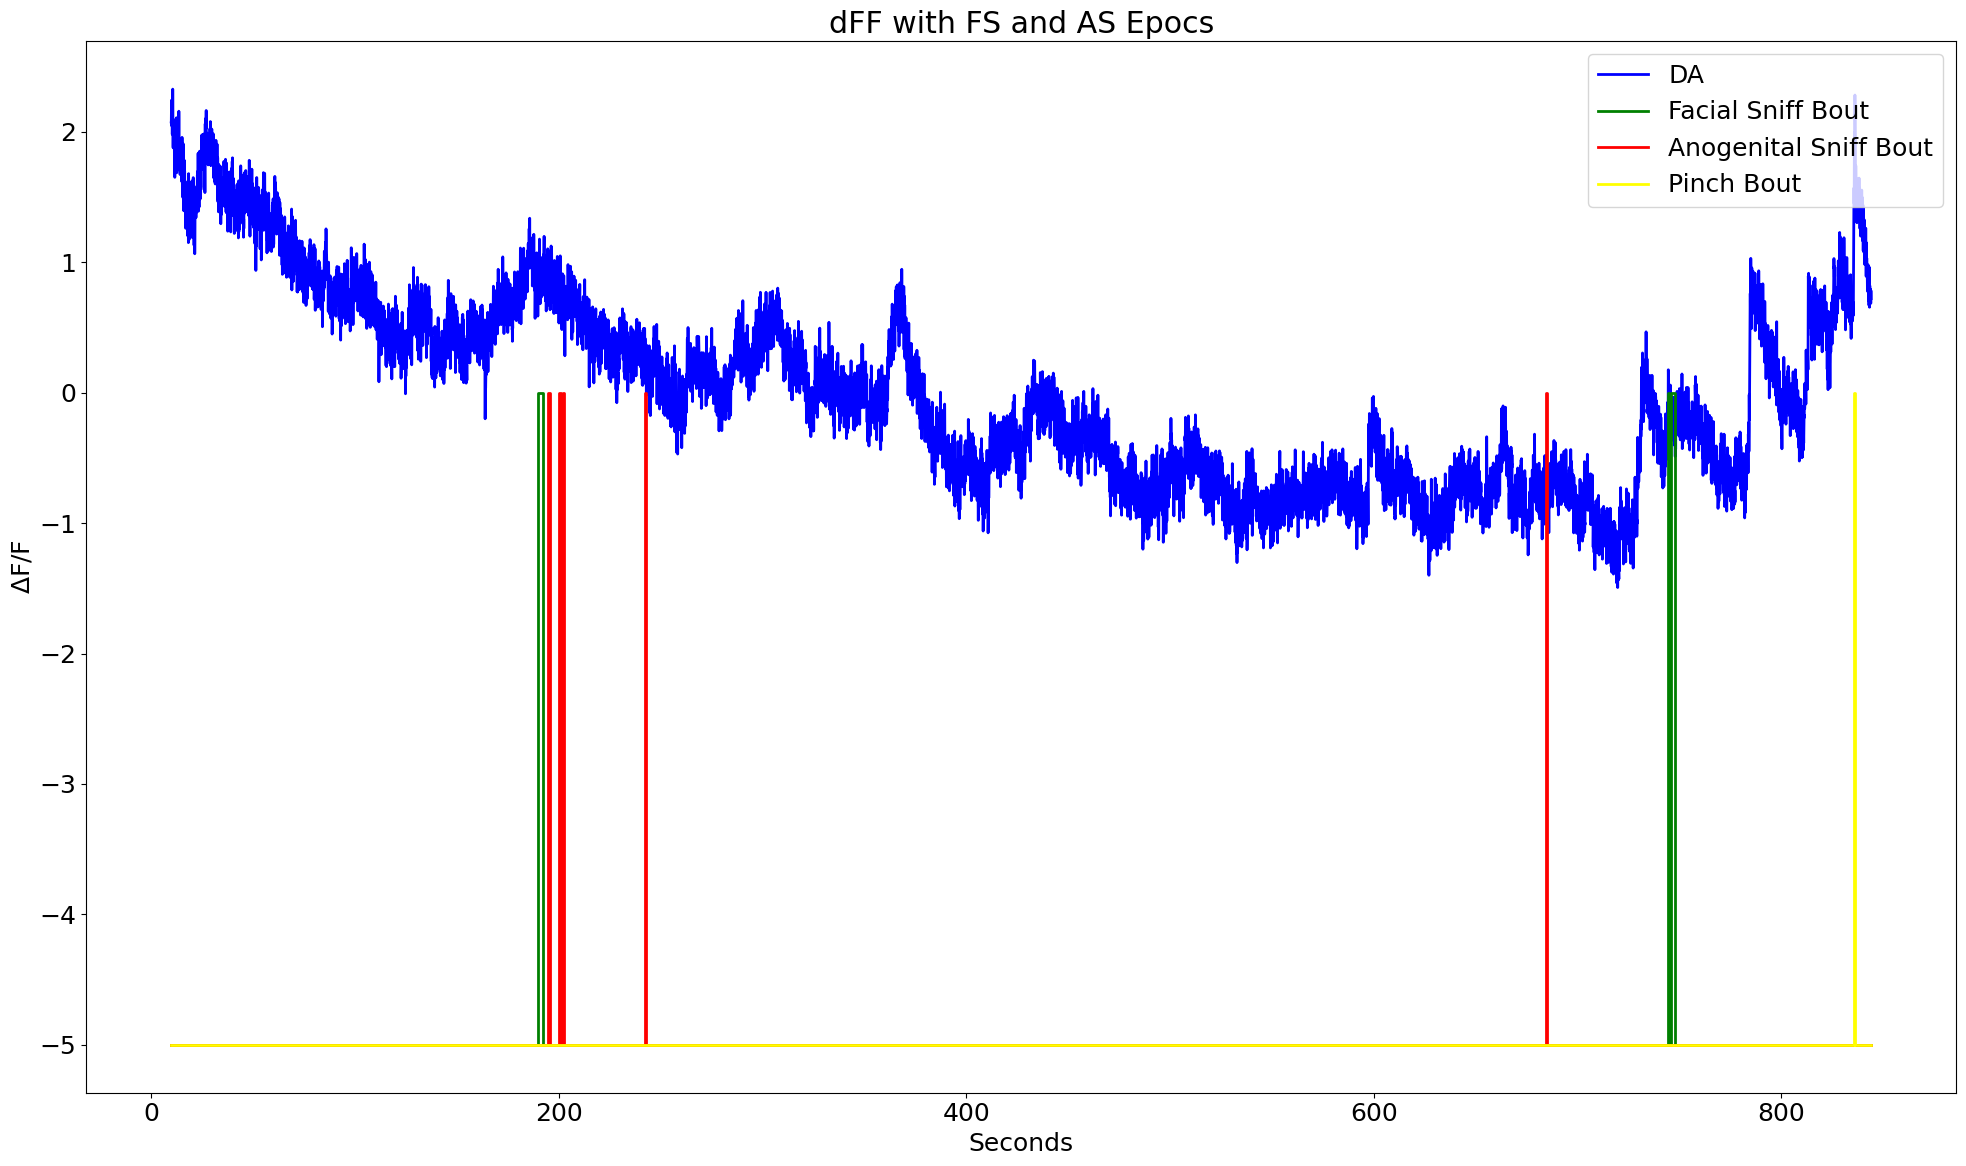

In [68]:
y_scale = 5 #adjust according to data needs
y_shift = -5 #scale and shift are just for aesthetics

# First subplot in a series: dFF with lick epocs
fig2 = plt.figure(figsize=(20,12))
ax2 = fig2.add_subplot(111)

p1, = ax2.plot(mPFC_time, dFF, linewidth=2, color='blue', label='DA')
p2, = ax2.plot(FS_EVENT_x, y_scale*FS_EVENT_y+y_shift, linewidth=2, color='green', label='Facial Sniff Bout')
p3, = ax2.plot(AS_EVENT_x, y_scale*AS_EVENT_y+y_shift, linewidth=2, color='red', label='Anogenital Sniff Bout')
p4, = ax2.plot(PINCH_EVENT_x, y_scale*PINCH_EVENT_y+y_shift, linewidth=2, color='yellow', label='Pinch Bout')


ax2.set_ylabel(r'$\Delta$F/F')
ax2.set_xlabel('Seconds')
ax2.set_title('dFF with FS and AS Epocs')
ax2.legend(handles=[p1,p2,p3,p4], loc='upper right')
fig2.tight_layout()

### Make nice area fills instead of epocs for aesthetics

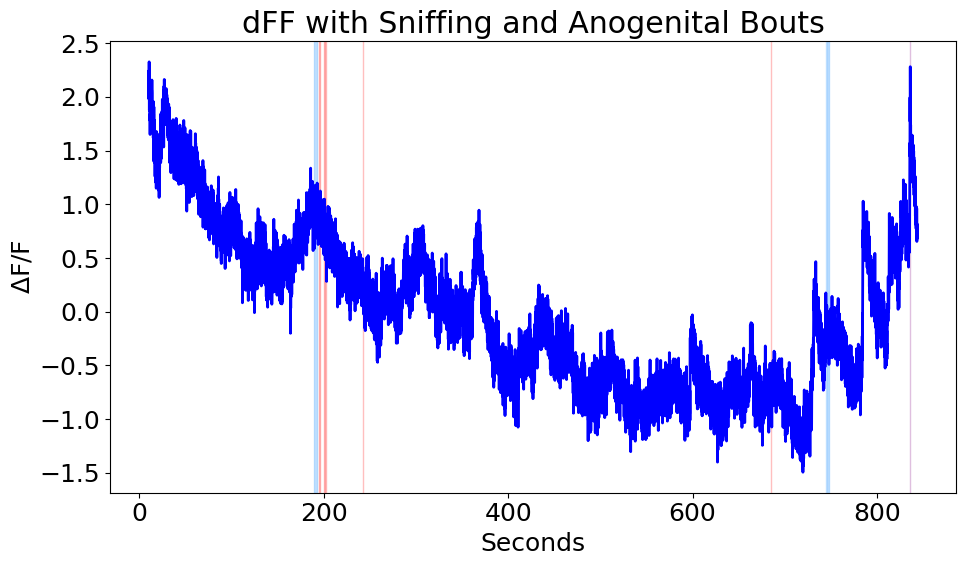

In [69]:
fig4 = plt.figure(figsize=(10,6))
ax5 = fig4.add_subplot(111)

p1, = ax5.plot(mPFC_time, dFF,linewidth=2, color='blue', label='DA')
for on, off in zip(mPFC_data.epocs[FS_EVENT].onset, mPFC_data.epocs[FS_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='dodgerblue')
    
for on, off in zip(mPFC_data.epocs[AS_EVENT].onset, mPFC_data.epocs[AS_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='red')
    
for on, off in zip(mPFC_data.epocs[PINCH_EVENT].onset, mPFC_data.epocs[PINCH_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='purple')
    
ax5.set_ylabel(r'$\Delta$F/F')
ax5.set_xlabel('Seconds')
ax5.set_title('dFF with Sniffing and Anogenital Bouts')
fig4.tight_layout()